<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1oiJH4EkMvOk4c6ZVs5NCTzrmZZuFA8hN

Downloading...
From: https://drive.google.com/uc?id=1oiJH4EkMvOk4c6ZVs5NCTzrmZZuFA8hN
To: /content/USA_Housing.csv
100% 726k/726k [00:00<00:00, 85.2MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
USAhousing = pd.read_csv('/content/USA_Housing.csv')

X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

USAhousing.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [ ]:
print(USAhousing.shape)

(5000, 7)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3000, 5), (3000,), (2000, 5), (2000,))

# linear regressoin

In [ ]:
# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test)
print("y_pred.shape:", y_pred.shape)

for i in zip(y_test[:5], y_pred[:5]):
    print(f"real price: {round(i[0], 1)}, predicted price: {round(i[1], 1)}")


y_pred.shape: (2000,)
real price: 1251688.6, predicted price: 1260960.7
real price: 873048.3, predicted price: 827588.8
real price: 1696977.7, predicted price: 1742421.2
real price: 1063964.3, predicted price: 974625.4
real price: 948788.3, predicted price: 998717.8


In [ ]:
# Evaluate the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897


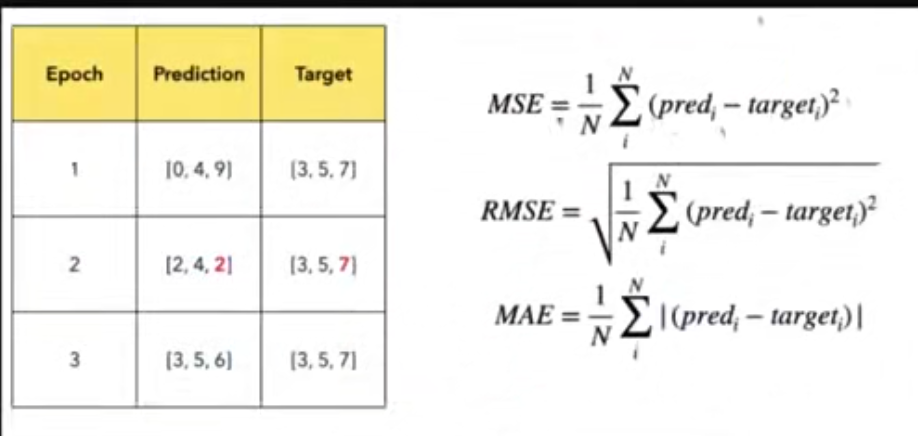

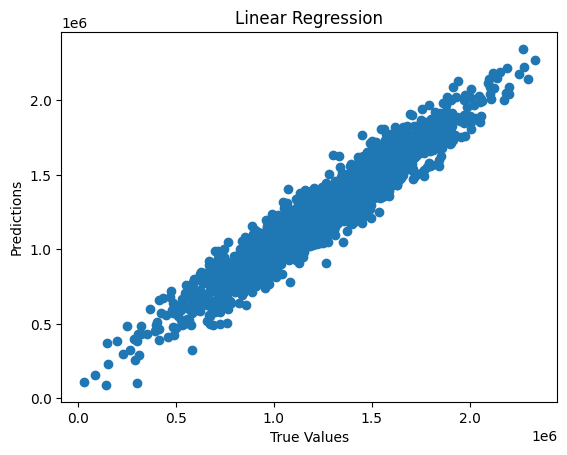

In [ ]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

# unsupervised

## mnist

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Preprocess the data
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

# Normalize the data
X /= 255.0

X.shape, y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((70000, 784), (70000,))

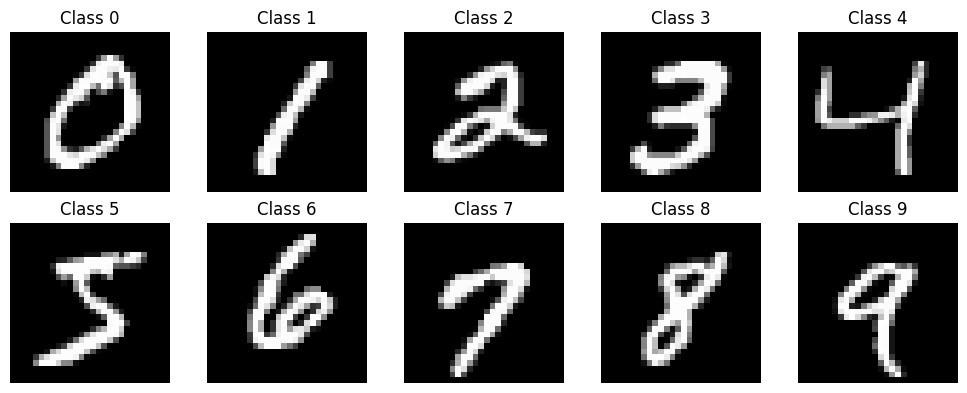

In [ ]:
# Initialize a dictionary to hold one example of each class
examples = {}

# Find one example of each class
for i in range(10):
    examples[i] = X[y == i].to_numpy()[0].reshape(28, 28)

# Plot one example of each class
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(examples[i], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(2)
X_pca = pca.fit_transform(X)

print("Before PCA", X.shape)
print("After PCA", X_pca.shape)

Before PCA (70000, 784)
After PCA (70000, 2)


## K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


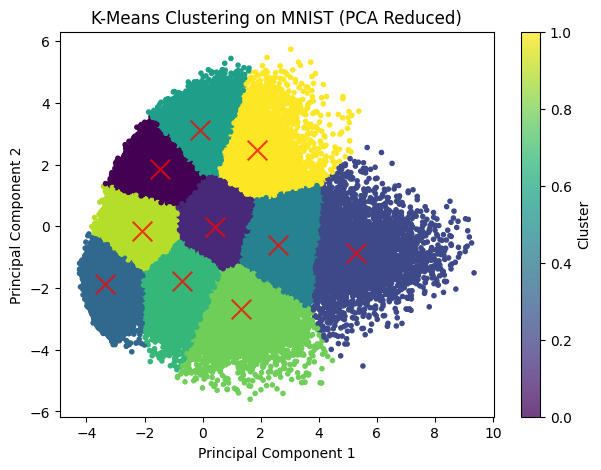

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster for each data point
clusters = kmeans.predict(X_pca)

centers = kmeans.cluster_centers_
# Plot the clusters
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')
scatter = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering on MNIST (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Logistic Regression